# Explore here

In [ ]:
# Your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"

data = pd.read_csv(url)

print(data.head())



   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
cols_to_fix = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols_to_fix:
    data[col] = data[col].replace(0, data[col].mean())

In [7]:
X = data.drop(columns=["Outcome"])
y = data["Outcome"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
boost = GradientBoostingClassifier(random_state=42)
boost.fit(X_train, y_train)

y_pred = boost.predict(X_test)
print("Boosting Accuracy:", accuracy_score(y_test, y_pred))

Boosting Accuracy: 0.7662337662337663


In [ ]:
models = [
    GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42),
    GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=4, random_state=42),
    GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, max_depth=2, random_state=42),
    GradientBoostingClassifier(n_estimators=300, learning_rate=0.7, max_depth=5, random_state=42)
]

accuracies = []

for i, model in enumerate(models, start=1):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Model {i} Accuracy: {acc:.4f}")

Model 1 Accuracy: 0.7727
Model 2 Accuracy: 0.7403
Model 3 Accuracy: 0.7338
Model 4 Accuracy: 0.7273


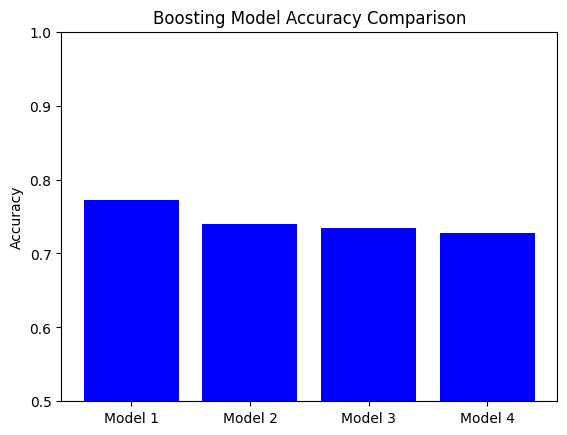

In [30]:
plt.bar(range(1, len(accuracies) + 1), accuracies, color="blue")
plt.xticks(range(1, len(accuracies) + 1), [f"Model {i}" for i in range(1, len(accuracies) + 1)])
plt.ylabel("Accuracy")
plt.title("Boosting Model Accuracy Comparison")
plt.ylim(0.5, 1)
plt.show()

In [18]:
import joblib
joblib.dump(models[accuracies.index(max(accuracies))], "boosting_diabetes_model.pkl")

['boosting_diabetes_model.pkl']

In [23]:
param_grid = {
    "n_estimators": [50, 100, 150],
    "learning_rate": [0.05, 0.1],
    "max_depth": [2, 3, 4]
}


boost = GradientBoostingClassifier(random_state=42)
grid = GridSearchCV(boost, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-validated accuracy:", grid.best_score_)

Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Best cross-validated accuracy: 0.7818206050912968


In [24]:
best_boost = grid.best_estimator_
y_pred = best_boost.predict(X_test)

print("Test set accuracy:", accuracy_score(y_test, y_pred))

Test set accuracy: 0.7727272727272727


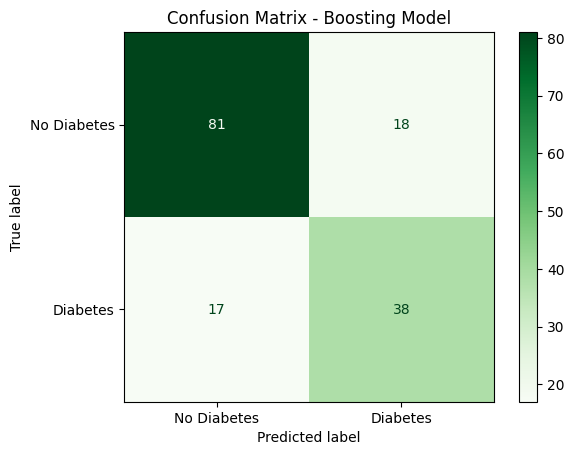

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Diabetes", "Diabetes"])
disp.plot(cmap="Greens")
plt.title("Confusion Matrix - Boosting Model")
plt.show()

In [32]:
X_train
y_train

60     0
618    1
346    0
294    0
231    1
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 614, dtype: int64

In [ ]:
# Not sure if i mandatory needed to use XGboost -  I used GradientBoostingClassifier

